# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team-14**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.
 
### Predict Overview: Climate Change Belief Analysis 2022 Challenge

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of classifying whether or not a person believes in climate change;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in `climate change`, based on their `novel tweet data`.

> Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
import string
import neattext.functions as nt
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


# set plot style
sns.set()

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

ModuleNotFoundError: No module named 'neattext'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv('train.csv') # load the data
#df_test = pd.read_csv('test.csv') # load the data

In [3]:
# View dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
#df_test.head()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Class Description (Sentiments)
* 2  : News: the tweet links to factual news about climate change
* 1  : Pro: the tweet supports the belief of man-made climate change
* 0  : Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1: Anti: the tweet does not believe in man-made climate change

List of all the Sentiments types which are present in this dataset

In [6]:
# list of unique types of Sentiments
type_sentis = list(sorted(df_train.sentiment.unique()))
print(type_sentis)

[-1, 0, 1, 2]


Data samples for each of the different Sentiment types

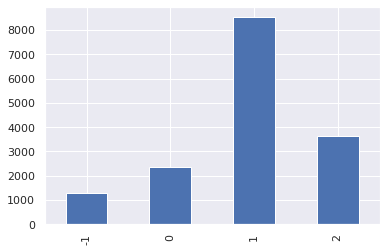

In [7]:
df_train['sentiment'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

For the dataset we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation

In [8]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['clean_message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [9]:
df_train.head(10)

,sentiment,message,tweetid,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,It's not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."
5,1,Worth a read whether you do or don't believe i...,425577,Worth a read whether you do or don't believe i...
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,RT @thenation: Mike Pence doesn’t believe in g...
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,RT @makeandmendlife: Six big things we can ALL...
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,@AceofSpadesHQ My 8yo nephew is inconsolable. ...
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,RT @paigetweedy: no offense… but like… how do ...


Make all text lower case

In [10]:
df_train['clean_message'] = df_train['clean_message'].str.lower()

In [11]:
puncts = list(string.punctuation)
#puncts.append('…')
print(puncts)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [12]:
def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in puncts]) 

In [13]:
df_train['clean_message'] = df_train['clean_message'].apply(remove_punctuation)

In [14]:
df_train['clean_message'].iloc[9]

'rt paigetweedy no offense… but like… how do you just not believe… in global warming………'

In [15]:
df_train['clean_message'].iloc[7]

'rt makeandmendlife six big things we can all do today to fight climate change or how to be a climate activistã¢â‚¬â¦ urlweb hã¢â‚¬â¦'

Some special characters not included in the string.punctuation module were not removed. We will utilize NeatText to further clean the text.

In [16]:
# Remove special characters using NeatText
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_special_characters)

In [17]:
df_train['clean_message'].iloc[7]

'rt makeandmendlife six big things we can all do today to fight climate change or how to be a climate activist urlweb h'

In [18]:
df_train['clean_message'].iloc[9]

'rt paigetweedy no offense but like how do you just not believe in global warming'

In [19]:
# Remove multiple whitespace between words
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_multiple_spaces)

In [20]:
df_train[['message','clean_message']]

,message,clean_message
0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...
1,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...
2,RT @RawStory: Researchers say we have three ye...,rt rawstory researchers say we have three year...
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in ...
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt soynoviodetodas its 2016 and a racist sexis...
...,...,...
15814,RT @ezlusztig: They took down the material on ...,rt ezlusztig they took down the material on gl...
15815,RT @washingtonpost: How climate change could b...,rt washingtonpost how climate change could be ...
15816,notiven: RT: nytimesworld :What does Trump act...,notiven rt nytimesworld what does trump actual...
15817,RT @sara8smiles: Hey liberals the climate chan...,rt sara8smiles hey liberals the climate change...


In [21]:
df_train = df_train.drop('message', axis=1)

In [22]:
df_train.head()

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,126103,its not like we lack evidence of anthropogenic...
2,2,698562,rt rawstory researchers say we have three year...
3,1,573736,todayinmaker wired 2016 was a pivotal year in ...
4,1,466954,rt soynoviodetodas its 2016 and a racist sexis...


Tokenization

In [23]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [24]:
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['clean_message'].apply(tokeniser.tokenize)

In [25]:
df_train['tokens'].iloc[9]

['rt',
 'paigetweedy',
 'no',
 'offense',
 'but',
 'like',
 'how',
 'do',
 'you',
 'just',
 'not',
 'believe',
 'in',
 'global',
 'warming']

#### Stemming

In [26]:
stemmer = SnowballStemmer('english')

In [27]:
def dset_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [28]:
df_train['stem'] = df_train['tokens'].apply(dset_stemmer, args=(stemmer, ))

In [29]:
for i, t in enumerate(df_train.iloc[9]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[9]['stem'][i]))

rt                   --> rt        
paigetweedy          --> paigetweedi
no                   --> no        
offense              --> offens    
but                  --> but       
like                 --> like      
how                  --> how       
do                   --> do        
you                  --> you       
just                 --> just      
not                  --> not       
believe              --> believ    
in                   --> in        
global               --> global    
warming              --> warm      


### Lemmatization


In [30]:
lemmatizer = WordNetLemmatizer()

In [31]:
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

cat
cactus
goose
rock
python
good
best
run
run


In [32]:
def dset_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [33]:
df_train['lemma'] = df_train['tokens'].apply(dset_lemma, args=(lemmatizer, ))

In [34]:
for i, t in enumerate(df_train.iloc[13]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[13]['lemma'][i]))

rt                   --> rt        
alifaith55           --> alifaith55
oh                   --> oh        
my                   --> my        
godtrumps            --> godtrumps 
government           --> government
removes              --> remove    
climate              --> climate   
change               --> change    
page                 --> page      
from                 --> from      
epa                  --> epa       
website              --> website   
hours                --> hour      
ahead                --> ahead     
of                   --> of        
climatemarchurlweb   --> climatemarchurlweb


In [35]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [36]:
#df_train['stop_w'] = df_train['tokens'].apply(remove_stop_words)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


#### Graphical Multivariate

First we will create a word could image of the frequently twitted word in each of the different classes which are as follows:

* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [4]:
df_gm = df_train.copy()

In [9]:
#create different dataframes for each of the classes
df_news= df_gm.drop(df_gm[df_gm.sentiment <= 1].index)

df_pro= df_gm.drop(df_gm[df_gm.sentiment<=0].index)
df_pro= df_gm.drop(df_gm[df_gm.sentiment>=2].index)

df_neutral= df_gm.drop(df_gm[df_gm.sentiment<=(-1)].index)
df_neutral= df_gm.drop(df_gm[df_gm.sentiment>=1].index)

df_anti= df_gm.drop(df_gm[df_gm.sentiment>=0].index)

In [10]:
import matplotlib.pyplot as plt
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

Text(0.5, 1.0, 'Anti Tweets')

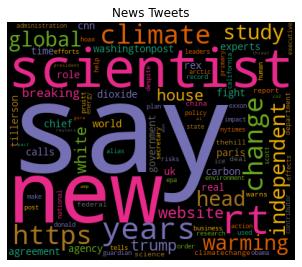

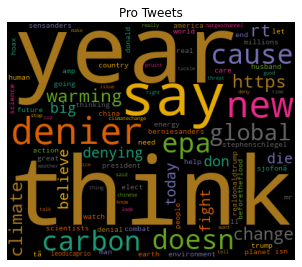

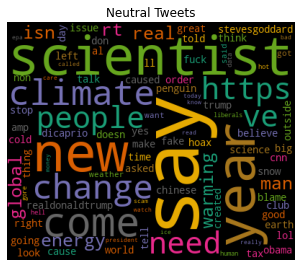

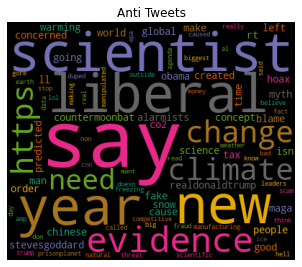

In [12]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_news['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2
#createWordCloud
a=wc.generate(string)

plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(a)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("News Tweets")
##########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_pro['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
b=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(b)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.title("Pro Tweets")
##################################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_neutral['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
c=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(c)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Neutral Tweets")

#########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_anti['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
d=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(d)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Anti Tweets")
